# Introduction to Scikit-Learn (sklearn)

This notebook demonstrate some of the most useful function of the beautiful Scikit-Learn liberary.

What we'er going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0, An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# 1, # Create X AND Y
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y  (labels)
y = heart_disease['target']

In [3]:
# To ignore all warnings 
#import warnings
#warnings.filterwarnings('ignore') # not advisable for junior devs

In [4]:
# 2, Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() # can be called model

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features Matrix
    y,  # Target variable
    test_size=0.2,  # 20% of the data for testing and 80% for training
    # random_state=42  # Ensures reproducibility
)

In [6]:
import sklearn
sklearn.show_versions()


System:
    python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\charles\Desktop\AI_Machine-Learning_-_Data-Science\sample_project\env\python.exe
   machine: Windows-11-10.0.22631-SP0

Python dependencies:
      sklearn: 1.5.1
          pip: 24.2
   setuptools: 72.1.0
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: None
       pandas: 2.2.2
   matplotlib: 3.9.2
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 6
         prefix: mkl_rt
       filepath: C:\Users\charles\Desktop\AI_Machine-Learning_-_Data-Science\sample_project\env\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: vcomp
       filepath: C:\Users\charles\Desktop\AI_Machine-Learning_-_Data-Science\sample_project\env\vcomp140.dll
 

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# make a prediction
# y_label = clf.predict(np.array([0, 2, 3, 4]))
# ValueError: Expected 2D array, got 1D array instead:

In [9]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [10]:
y_test

138    1
12     1
141    1
79     1
65     1
      ..
98     1
178    0
243    0
147    1
238    0
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaluate the model on the training data test data
clf.score(X_train, y_train)

1.0

In [12]:
clf.score(X_test, y_test)

0.8360655737704918

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[22,  6],
       [ 4, 29]], dtype=int64)

In [15]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [16]:
# 5, Improve a model
# Try different amount of n_estimators

# Loop through different numbers of estimators
for i in range(10, 100, 10): # from 10 - 100 step 10
    # Print the current number of estimators being tried
    print(f"Trying model with {i} estimators...")
    
    # Create a RandomForestClassifier with the current number of estimators
    clf = RandomForestClassifier()
    
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    
    # Calculate and print the model's accuracy on the test set
    accuracy = clf.score(X_test, y_test) * 100
    print(f"Model accuracy on test set: {accuracy:.2f}%")

Trying model with 10 estimators...
Model accuracy on test set: 86.89%
Trying model with 20 estimators...
Model accuracy on test set: 83.61%
Trying model with 30 estimators...
Model accuracy on test set: 80.33%
Trying model with 40 estimators...
Model accuracy on test set: 86.89%
Trying model with 50 estimators...
Model accuracy on test set: 83.61%
Trying model with 60 estimators...
Model accuracy on test set: 80.33%
Trying model with 70 estimators...
Model accuracy on test set: 83.61%
Trying model with 80 estimators...
Model accuracy on test set: 83.61%
Trying model with 90 estimators...
Model accuracy on test set: 81.97%


In [17]:
# 6. Save model and load it
import pickle
pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.819672131147541

What we'er going to cover:

In [19]:
# Let's listify the contents
machine_learning_steps = [
'0. An end-to-end Scikit-Learn workflow',
'1. Getting the data ready.',
'2. choose the right estimator/algorithm for our problems',
'3. Fit the model/algorithm and use it to make predictions on our data',
'4. Evaluating a model',
'5. Improve a model',
'6. Save and load a trained model',
'7. Putting it all together]',]

In [20]:
machine_learning_steps

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready.',
 '2. choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together]']

## 1. Getting our data ready to be used with machine learning
 
Three main things we have to do:

    1. Split the data into features and labels (usually 'X' & 'y')
    
    2. Filling (also called imputing) or disregarding missing values
    
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [21]:
# 1, # Create X AND Y
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y  (labels)
y = heart_disease['target']


In [22]:
# NOTE : Never evaluate or test your model on data the model has learned from thus we:-
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features Matrix
    y,  # Target variable
    test_size=0.2,  # 20% of the data for testing and 80% for training
    # random_state=42  # Ensures reproducibility
)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
X.shape

(303, 13)

### Clean Data -> Transform Data -> Reduce Data
### 1.1 Make sure the data is all numerical

In [25]:

car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
car_sales['Doors'].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [27]:
len(car_sales)

1000

In [28]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
# Create X AND y
# Create X (features matrix)
X = car_sales.drop('Price', axis=1)

# Create y  (labels)
y = car_sales['Price']

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features Matrix
    y,  # Target variable
    test_size=0.2,  # 20% of the data for testing and 80% for training
    # random_state=42  # Ensures reproducibility
)

In [30]:
# Turn the categories into numbers, if feature include str types
# To avoid ValueError: could not convert string to float: 'Toyota'
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder() # This encoder will convert each category into a new column with binary values (0 or 1).
transformer = ColumnTransformer([('one_hot',
                                  one_hot, # applies the OneHotEncoder to the specified categorical columns
                                  categorical_features)], # specified categorical columns
                                 remainder='passthrough') # part means that all other columns (not listed in categorical_features) will be left unchanged.
transformed_X = transformer.fit_transform(X) # This line applies the transformations to your dataset X
transformed_X

####################
# simpler approch for smaller project, need a quick solution, or are just starting out and want to keep things simple.
# X = pd.get_dummies(X, columns=['Make', 'Colour', 'Doors'])

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [31]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [32]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [33]:
# Let's refit the model
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(
    transformed_X,  # Features Matrix
    y,  # Target variable
    test_size=0.2,  # 20% of the data for testing and 80% for training
    # random_state=42  # Ensures reproducibility
)

model.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether

In [35]:
# import car sales missing data
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# Create X AND y
# Create X (features matrix)
X = car_sales_missing.drop('Price', axis=1)

# Create y  (labels)
y = car_sales_missing['Price']

In [38]:
# Turn the categories into numbers, if feature include str types
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder() # This encoder will convert each category into a new column with binary values (0 or 1).
transformer = ColumnTransformer([('one_hot',
                                  one_hot, # applies the OneHotEncoder to the specified categorical columns
                                  categorical_features)], # specified categorical columns
                                 remainder='passthrough') # part means that all other columns (not listed in categorical_features) will be left unchanged.
transformed_X = transformer.fit_transform(X) # This line applies the transformations to your dataset X
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [39]:
# tutors notebook show value error: input contains NaN,but my notebook does not show error. 

#### Option 1: Fill missing data with Pandas

In [40]:
# Fill the 'Make, Colour, Odometer (KM) and Doors' column
car_sales_missing.loc[:, 'Make'] = car_sales_missing['Make'].fillna('missing')
car_sales_missing.loc[:, 'Colour'] = car_sales_missing['Colour'].fillna('missing')
car_sales_missing.loc[:, 'Odometer (KM)'] = car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean()).round(2)
car_sales_missing.loc[:, 'Doors'] = car_sales_missing['Doors'].fillna(4)

In [41]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [42]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [43]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [44]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [45]:
len(car_sales_missing)

950

In [46]:
# Create X AND y
# Create X (features matrix)
X = car_sales_missing.drop('Price', axis=1)

# Create y  (labels)
y = car_sales_missing['Price']

In [47]:
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder() # This encoder will convert each category into a new column with binary values (0 or 1).
transformer = ColumnTransformer([('one_hot',
                                  one_hot, # applies the OneHotEncoder to the specified categorical columns
                                  categorical_features)], # specified categorical columns
                                 remainder='passthrough') # part means that all other columns (not listed in categorical_features) will be left unchanged.
transformed_X = transformer.fit_transform(car_sales_missing) # This line applies the transformations to your dataset X
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [48]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [49]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [50]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [51]:
# Split into X & y
X = car_sales_missing.drop('Price', axis = 1)
y= car_sales_missing['Price']

In [52]:
# Fill missing value with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])

# Transform the data
filled_X  = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [53]:
car_sales_filled = pd.DataFrame(filled_X, 
                                columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [54]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [55]:
# Turn the categories into numbers, if feature include str types
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder() # This encoder will convert each category into a new column with binary values (0 or 1).
transformer = ColumnTransformer([('one_hot',
                                  one_hot, # applies the OneHotEncoder to the specified categorical columns
                                  categorical_features)], # specified categorical columns
                                 remainder='passthrough') # part means that all other columns (not listed in categorical_features) will be left unchanged.
transformed_X = transformer.fit_transform(car_sales_filled) # This line applies the transformations to your dataset X
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [56]:
# Now we've got our data as numbers and no missing vales 
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    transformed_X,  # Features Matrix
    y,  # Target variable
    test_size=0.2,  # 20% of the data for testing and 80% for training
    # random_state=42  # Ensures reproducibility
)

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [57]:
# Option 2 performs worse because it has less sample counts than Option 1
print('Option 1 samples:', len(car_sales) ),
print('Option 2 samples:', len(car_sales_filled) )

Option 1 samples: 1000
Option 2 samples: 950


## 2. Choosing the right esitmators/algorithm for your problem

Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll se 'clf' (short for classifier) used as a claasification estimator
* Regression problem - predicting a contineus quantity like number stock prices (selling price of a car)
* Looking for the right machine learning model go to https://scikit-learn.org/stable/machine_learning_map.html

In [58]:
machine_learning_steps

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready.',
 '2. choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together]']

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset

In [59]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [60]:
housing_df = pd.DataFrame(housing['data'], columns = housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [61]:
housing_df['MedHouseVal'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [62]:
# For consistency and avoid confusion rename 'MedHouseVal' to 'Target'
housing_df= housing_df.drop('MedHouseVal', axis=1)

housing_df['Target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
# Ridge

In [64]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
#np.random.seed(42)

# Create data X & y
X = housing_df.drop('Target', axis = 1)
y = housing_df['Target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features Matrix
    y,  # Target variable
    test_size=0.2,  # 20% of the data for testing and 80% for training
    random_state=42  # Ensures reproducibility same as #np.random.seed(42)
)

# Check sklearn MA map, instantate and fit the model (on the traning set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)


0.5758549611440126

What if 'Ridge' didn't work or the score didn't fit our needs?
well, we could always try a different model..

How about we try an esemble model (am ensemble is a combination of smaller models to try and make better predictions than just a single model). Docs found here: https://scikit-learn.org/0.16/modules/ensemble.html



In [65]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
#np.random.seed(42)

# Create data X & y
X = housing_df.drop('Target', axis = 1)
y = housing_df['Target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features Matrix
    y,  # Target variable
    test_size=0.2,  # 20% of the data for testing and 80% for training
    random_state=42  # Ensures reproducibility same as #np.random.seed(42)
)

# Check sklearn MA map, instantate and fit the model (on the traning set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8071309481870033

### 2.2 Picking a machine learning model for a classification problem
Let's check the sklearn map...https://scikit-learn.org/stable/machine_learning_map.html

In [66]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
len(heart_disease)

303

After consulting the map, it says to try LinearSVC

In [68]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification # for creating syntatic data if real data is not available

# Setup random seed
# np.random.seed(42)

# Create data X & y
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features Matrix
    y,  # Target variable
    test_size=0.2,  # 20% of the data for testing and 80% for training
    random_state=42  # Ensures reproducibility same as #np.random.seed(42)
)

# Instantiate the linearSVC (model)
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [69]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [70]:
# Import the RandomForestClassifier estimator class and compare accuracy with LinearSVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification

# Setup random seed
# np.random.seed(42)

# Create data X & y
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features Matrix
    y,  # Target variable
    test_size=0.2,  # 20% of the data for testing and 80% for training
    random_state=42  # Ensures reproducibility same as #np.random.seed(42)
)

# Instantiate the Random Forest Classifier (model)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8688524590163934

 TIPBIT:

    1. If you have structured data, use ensemble methods
    2. if you have unstructured data, use deep learning or transfer learning

More on the TIPBIT

1. **Structured Data and Ensemble Methods**:
   - **Structured data** is typically organized in tables with rows and columns, like spreadsheets or databases.
   - **Ensemble methods** (e.g., Random Forest, Gradient Boosting) combine multiple models to improve performance and reduce overfitting. They are powerful for structured data because they can capture complex patterns and interactions.

2. **Unstructured Data and Deep Learning/Transfer Learning**:
   - **Unstructured data** includes text, images, audio, and video, which don't fit neatly into tables.
   - **Deep learning** models (e.g., Convolutional Neural Networks for images, Recurrent Neural Networks for text) excel at extracting features from unstructured data.
   - **Transfer learning** involves using pre-trained models on similar tasks, which can save time and resources, especially when you have limited data.


In [71]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
machine_learning_steps

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready.',
 '2. choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together]']

## 3. Fit the model/algorithm on our data and use it to make prediction

### 3.1 Fitting the model to the data

Different names for:
* 'X' = features matrix, features variables, data
* 'y' = labels, targets, target variables

In [73]:
# Import the RandomForestClassifier estimator class and compare accuracy with LinearSVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification

# Setup random seed
# np.random.seed(42)

# Create data X & y
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features Matrix
    y,  # Target variable
    test_size=0.2,  # 20% of the data for testing and 80% for training
    random_state=42  # Ensures reproducibility same as #np.random.seed(42)
)

# Instantiate the Random Forest Classifier (model)
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8688524590163934

In [74]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [75]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [76]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### Random Forest model deep dive

Resource:
* https://en.wikipedia.org/wiki/Random_forest
* https://simple.wikipedia.org/wiki/Random_forest
* https://willkoehrsen.github.io/machine%20learning/tutorial/an-implementation-and-explanation-of-the-random-forest-in-python/


### 3.2 Make prediction using a machine learning model

2 ways to make prediction:

1. predict() function
2. predict_proba() function

#### 3.2.1 Make predictions with Predict() function

In [77]:
# Use a trained model to make predictions
# clf.predict(np.array([1, 7, 8, 3, 4])) # this doen't work

In [78]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [79]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [80]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [81]:
# Compare pediction to truth labels to evaluate the models
y_preds = clf.predict(X_test) # Generates predictions for each sample in the test data.
np.mean(y_preds == y_test) # Calculates the proportion of correct predictions.(manual version of clf.score() )

0.8688524590163934

In [82]:
# this also Compare's pediction to truth labels to evaluate the models
clf.score(X_test, y_test) # Evaluates the overall performance of the model.

0.8688524590163934

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

#### 3.2.2 Make pediction with predict_proba() function

In [84]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.3 , 0.7 ],
       [0.41, 0.59],
       [0.85, 0.15],
       [0.26, 0.74]])

In [85]:
#. clf.predict_proba(X_test) returns array([0.86, 0.14], ...) i.e 0.86 + 0.14 = 1

In [86]:
# Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [87]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Function predict() can also be used for regression models.

In [88]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [89]:
from sklearn.ensemble import RandomForestRegressor

# Create data X & y
X = housing_df.drop('Target', axis = 1)
y = housing_df['Target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features Matrix
    y,  # Target variable
    test_size=0.2,  # 20% of the data for testing and 80% for training
    random_state=42  # Ensures reproducibility same as #np.random.seed(42)
)

# create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [90]:
y_preds[:10]

array([0.48132  , 0.74504  , 4.9132365, 2.59068  , 2.28096  , 1.64047  ,
       2.31978  , 1.67654  , 2.6131903, 4.8763986])

In [91]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [92]:
# Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3260386354893412

so y_preds is 0.3260386354893412 different from true label housing_df['Target']

In [93]:
housing_df['Target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

In [94]:
machine_learning_steps

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready.',
 '2. choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together]']

## 4. Evaluating a mechine learning model

Three ways to evaluate Scikit-Learn models/estimators: 
1. Estimato's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric function

Find more about this here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the 'score' method

In [95]:
from sklearn.ensemble import RandomForestClassifier

# Create data X & y
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features Matrix
    y,  # Target variable
    test_size=0.2,  # 20% of the data for testing and 80% for training
    random_state=42  # Ensures reproducibility same as #np.random.seed(42)
)

# Instantiate the Random Forest Classifier (model)
clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)





RandomForestClassifier(n_estimators=1000)

In [96]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train) # returns a perfect score of 1 everytime because model has been trained on same data

1.0

In [97]:
# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

Let's use the 'score()' on a regression problem...

In [98]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [99]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [100]:
from sklearn.ensemble import RandomForestRegressor
X = housing_df.drop('Target', axis=1)
y = housing_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_test,y_test)


RandomForestRegressor()

In [101]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest  = 0.0
model.score(X_test, y_test)

0.9643666312560141

### 4.2 Evaluating a model using the scoring parameter

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create data X & y
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features Matrix
    y,  # Target variable
    test_size=0.2,  # 20% of the data for testing and 80% for training
    random_state=42  # Ensures reproducibility same as #np.random.seed(42)
)

# Instantiate the Random Forest Classifier (model)
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
clf.score(X_test, y_test)

0.8524590163934426

In [104]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.90163934, 0.86885246, 0.78333333, 0.78333333])

In [105]:
cross_val_score(clf, X, y, cv=10)

array([0.87096774, 0.80645161, 0.87096774, 0.93333333, 0.86666667,
       0.8       , 0.7       , 0.83333333, 0.73333333, 0.86666667])

In [106]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [107]:
# Default scoring parameter of classifier  = mean acuracy
# clf.score()

In [108]:
# Scoring parameter set to None by default
np.random.seed(42)
cross_val_score(clf, X, y, cv=5,  scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### 1. Accuracy

In [109]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create data X & y
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']


# Instantiate the Random Forest Classifier (model)
clf = RandomForestClassifier(n_estimators=100)

cross_val_score = cross_val_score(clf, X, y, cv=5)
cross_val_score

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [111]:
np.mean(cross_val_score)

0.8018032786885245

In [112]:
print(f'Heart Disease Classifier Cross-Validated Accuray: {np.mean(cross_val_score) * 100:.2f}%') 

Heart Disease Classifier Cross-Validated Accuray: 80.18%


#### 2. AUC OR ROC
* Reciever operating  characteristic curve (ROC)
* Area under curve (AUC)

ROC curves are a comparison of a model's true psitive rate (TPR) versus a models false positive rate (fpr).
* True positive  = model predits 1 when is 1
* False positive  = model predicts 1 when is 0
* True negative  = model predicts 0 when is 0
* False negative  = model predicts 0 when is 1


In [113]:
# heart_disease data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_proba = clf.predict_proba(X_test)

y_proba[:10]

array([[0.93, 0.07],
       [0.47, 0.53],
       [0.45, 0.55],
       [0.81, 0.19],
       [0.24, 0.76],
       [0.15, 0.85],
       [0.26, 0.74],
       [0.93, 0.07],
       [0.97, 0.03],
       [0.46, 0.54]])

In [115]:
y_probs_positive = y_proba[:, 1]
y_probs_positive[:10]

array([0.07, 0.53, 0.55, 0.19, 0.76, 0.85, 0.74, 0.07, 0.03, 0.54])

In [116]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Chech the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.13793103, 0.24137931,
       0.24137931, 0.27586207, 0.34482759, 0.4137931 , 0.48275862,
       0.55172414, 0.65517241, 0.65517241, 0.86206897, 1.        ])

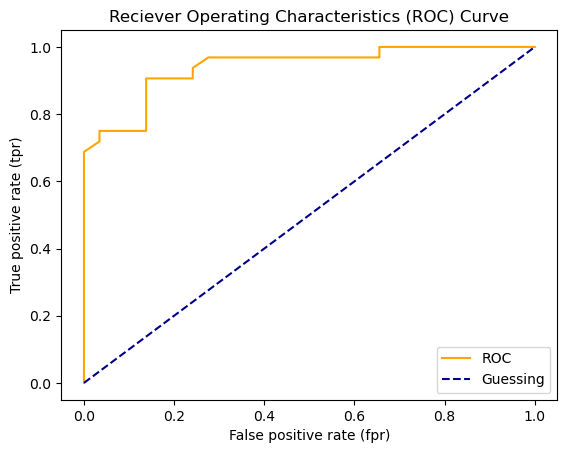

In [117]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr)
    abd true positive rate (tpr) of a model
    '''
    # PLOT ROC CURVE 
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    # PLOT LINE WITH NO PREDICTIVE POWER (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle= '--', label='Guessing')
    
    # CUSTOMIS THE PLOT
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Reciever Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [118]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9407327586206896

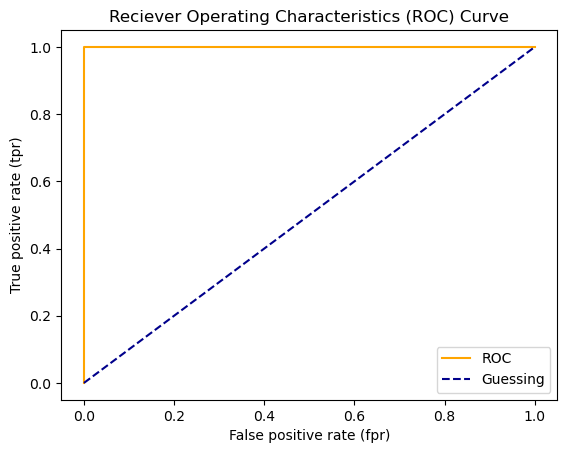

In [119]:
# Plot perfect ROC curve and AUC Score to compare
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [120]:
# Perfect AUC Score to compare
roc_auc_score(y_test, y_test)

1.0

#### 3. Confusion matrix

A confusion matrix is a way to compare the labels a model predicts and the actual labels it was supposed to predict. in essence, giving you an idea of where model is getting confused.

In [121]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [122]:
# Vosualise confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,3,29


In [123]:
22 + 7 + 8 + 24

61

In [124]:
len(y_preds)

61

In [125]:
len(y_test)

61

#### TIPBIT: How to install a module within jupyter notebook
import sys

!conda install --yes --prefix {sys.prefix} module-name

In [126]:
#import sys
#!conda install --yes --prefix {sys.prefix} seaborn

<Axes: >

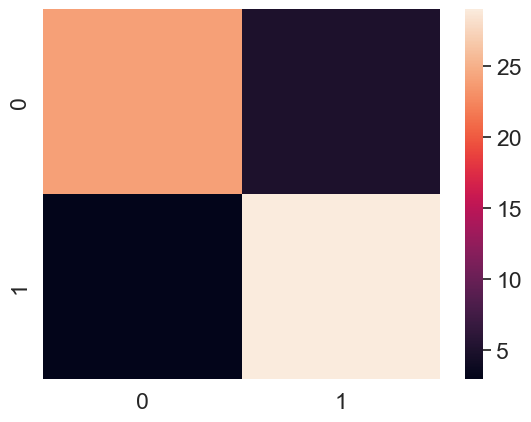

In [127]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the foon scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

### Creating a confusion matrix using Scikit-learn
To use the new method of creating a confusion matrix

In [128]:
clf

RandomForestClassifier()

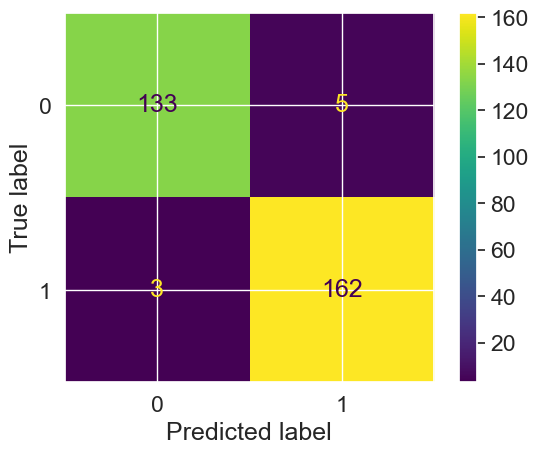

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

### Difference between sklearn's ConfusionMatrixDisplay.from_estimator and  ConfusionMatrixDisplay.from_predictions method is

*  from_estimator make the predictions for you.

WHILE

* from_predictions method needs the predictions ready

more on this:

ConfusionMatrixDisplay.from_estimator: This method takes an estimator (like a trained model) and the test data as inputs. It will use the estimator to make predictions on the test data and then generate the confusion matrix from these predictions. This is useful when you want to directly evaluate the performance of your model on a test set.

ConfusionMatrixDisplay.from_predictions: This method requires you to provide the actual and predicted labels. It generates the confusion matrix from these provided labels. This is useful when you already have the predictions and want to visualize the confusion matrix without needing to re-run the model.

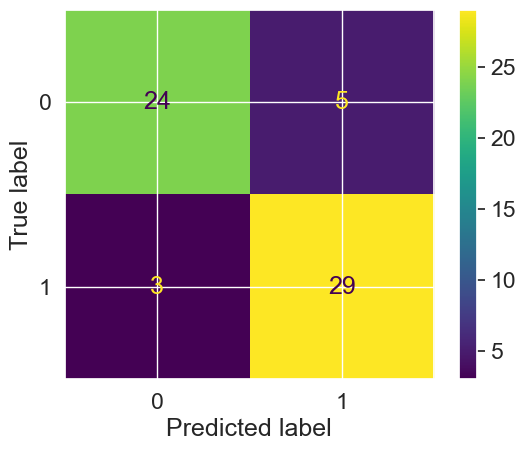

In [130]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

#### 4. Classification report

In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [132]:
# Where prexision and  recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\charles\Desktop\AI_Machine-Learning_-_Data-Science\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\charles\Desktop\AI_Machine-Learning_-_Data-Science\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\charles\Desktop\AI_Machine-Learning_-_Data-Science\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation matrics

Model evaluation metrics documentation - https://scikitlearn.org/stable/modules/model_evaluation.html#regression-metrics

the ones to cover are :

1. R^2 (r-squared) or ceofficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)
eck for mistakes.
Terms
|
Privacy
|
FAQs


more on these:

#### R² (R-squared) or Coefficient of Determination
- **What it is**: R² measures how well your model's predictions match the actual data.
- **Range**: It ranges from 0 to 1.
  - **0** means the model does not explain any variability in the data.
  - **1** means the model perfectly explains all the variability.
- **Example**: If you have an R² of 0.8, it means 80% of the variation in the dependent variable (e.g., exam scores) is explained by the independent variable (e.g., hours studied) in your model

#### Mean Absolute Error (MAE)
- **What it is**: MAE measures the average magnitude of errors in a set of predictions, without considering their direction (positive or negative).
- **How it's calculated**: Take the absolute difference between the predicted and actual values, sum them up, and then divide by the number of observations.
- **Example**: If your model predicts house prices and the MAE is \$10,000, on average, your predictions are off by \$10,000¹.

#### Mean Squared Error (MSE)
- **What it is**: MSE measures the average of the squares of the errors. It gives more weight to larger errors because the errors are squared.
- **How it's calculated**: Take the difference between the predicted and actual values, square it, sum these squared differences, and then divide by the number of observations.
- **Example**: If your model's MSE is 25, it means the average squared difference between the predicted and actual values is 25⁷.

#### Why Use These Metrics?
- **R²** helps you understand how well your model fits the data.
- **MAE** gives you a straightforward average error, which is easy to interpret.
- **MSE** penalizes larger errors more, which can be useful if you want to avoid large mistakes.


#### 1. R^2 (r-squared) or ceofficient of determination

What is does: Compares your models predition to the mean of the targets. value can rane from negativer infinity(a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value 

In [133]:
from sklearn.ensemble import RandomForestRegressor

X = housing_df.drop('Target', axis=1)
y = housing_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train,y_train)


RandomForestRegressor()

In [134]:
model.score(X_test, y_test)

0.8060411434664388

In [135]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [136]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: Target, Length: 4128, dtype: float64

In [137]:
y_test.mean()

2.0550030959302323

In [138]:
from sklearn.metrics import r2_score
 
# Fill an array with  y-test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [139]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [140]:
r2_score(y_true=y_test, 
        y_pred=y_test_mean)

0.0

In [141]:
r2_score(y_true=y_test,
        y_pred=y_test) 

1.0

#### 2. Mean Absolute Error (MAE)

MAE is the average of the absolute differences between prediction and actual values.

It gives you an idea of how wrong your models prediction are.

In [142]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32726866836240326

This means on average model prediction is on average -0.327943796027131 or +0.3279437960271319
from the actual target 'y'

In [143]:
df = pd.DataFrame(data={'actual values': y_test,
                       'predicted values': y_preds})

df['differences'] = df['predicted values'] - df['actual values']
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.492510,0.015510
3024,0.45800,0.745380,0.287380
15663,5.00001,4.806537,-0.193473
20484,2.18600,2.556040,0.370040
9814,2.78000,2.339160,-0.440840
13311,1.58700,1.628490,0.041490
7113,1.98200,2.407640,0.425640
7668,1.57500,1.670430,0.095430
18246,3.40000,2.626070,-0.773930
5723,4.46600,4.899339,0.433339


In [144]:
# MAE using formulas and differences
np.abs(df['differences']).mean()

0.32726866836240326

### 3. Mean squared error (MSE)
MSE is the mean if the square of the errors between actual and predicted values. 

In [145]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2541654270109171

In [146]:
df['squared_differences'] = np.square(df['differences'])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.492510,0.015510,0.000241
3024,0.45800,0.745380,0.287380,0.082587
15663,5.00001,4.806537,-0.193473,0.037432
20484,2.18600,2.556040,0.370040,0.136930
9814,2.78000,2.339160,-0.440840,0.194340


In [147]:
# Calculate MSE by hand
squared = np.square(df['differences'])
squared.mean()

0.2541654270109171

In [148]:
df_large_error = df.copy()
df_large_error.iloc[0, 3] = 16

df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.492510,0.015510,16.000000
3024,0.45800,0.745380,0.287380,0.082587
15663,5.00001,4.806537,-0.193473,0.037432
20484,2.18600,2.556040,0.370040,0.136930
9814,2.78000,2.339160,-0.440840,0.194340
...,...,...,...,...
15362,2.63300,2.225020,-0.407980,0.166448
16623,2.66800,2.028020,-0.639980,0.409574
18086,5.00001,4.868239,-0.131771,0.017364
2144,0.72300,0.713660,-0.009340,0.000087


In [149]:
# Calculate MSE with large error
df_large_error['squared_differences'].mean()

0.25804133772794713

In [150]:
# Insert large errors 
df_large_error.iloc[1:100, 3]= 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.492510,0.015510,16.000000
3024,0.45800,0.745380,0.287380,20.000000
15663,5.00001,4.806537,-0.193473,20.000000
20484,2.18600,2.556040,0.370040,20.000000
9814,2.78000,2.339160,-0.440840,20.000000
...,...,...,...,...
15362,2.63300,2.225020,-0.407980,0.166448
16623,2.66800,2.028020,-0.639980,0.409574
18086,5.00001,4.868239,-0.131771,0.017364
2144,0.72300,0.713660,-0.009340,0.000087


In [151]:
# Calculate MSE with larger error
df_large_error['squared_differences'].mean()

0.7341021521018603

In [152]:
 machine_learning_steps

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready.',
 '2. choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together]']

### 4.2.3 Finally using the `scoring` parameter

#### 1. Scoring parameter for a classification problem

In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)


In [154]:
np.random.seed(42) 

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None ) # if  scoring=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [155]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [156]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision' ) 
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [182]:
# Cross-validated Precision
print(f'The cross-validated Precision is: {np.mean(cv_precision):.2f}')

The cross-validated Precision is: 0.83


In [158]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall' ) 
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [183]:
# Cross-validated Recall
print(f'The cross-validated Recall is: {np.mean(cv_recall):.2f}')

The cross-validated Recall is: 0.85


#### 2. Scoring parameter for a regrassion problem

In [160]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('Target', axis=1)
y = housing_df['Target']

model = RandomForestRegressor(n_estimators=100)

In [161]:
# Cross-validation accuracy
np.random.seed(42) 
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None ) # if  scoring=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
np.mean(cv_r2)

0.6545458023124507

In [165]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [164]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_r2)*100:.2f}')

The cross-validated accuracy is: 65.45%


## NOTE:
1. **Scorer Object**: In machine learning, a scorer object is used to evaluate the performance of a model. This is done by comparing the model's predictions to the actual data.

2. **Scoring Parameter**: When you train a model, you can specify a scoring parameter to determine how the model's performance will be measured. This parameter can take predefined values, which are essentially different metrics used to evaluate the model.

3. **Higher Return Values are Better**: All scorer objects are designed so that higher values indicate better performance. For example, accuracy is a common metric where a higher percentage means better performance.

4. **Distance Metrics**: Some metrics measure how far off the model's predictions are from the actual data. For example, `mean_squared_error` calculates the average squared difference between the predicted and actual values. Lower values indicate better performance because they mean the predictions are closer to the actual values.

5. **Negated Metrics**: To fit the convention that higher values are better, metrics like `mean_squared_error` are available as `neg_mean_squared_error`. This simply means the metric's value is negated (multiplied by -1), so a smaller error becomes a larger negative number, making it easier to compare with other metrics where higher values are better.

TIPBIT:

- **Accuracy**: Higher accuracy means better performance.
- **Mean Squared Error (MSE)**: Lower MSE means better performance, but when using `neg_mean_squared_error`, a lower MSE becomes a higher negative value, which fits the convention.


In [173]:
# Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error' ) 
cv_mae

array([-0.54256026, -0.40902123, -0.43706982, -0.46918522, -0.47318856])

In [174]:
np.mean(cv_mae)

-0.46620501732073655

In [175]:
# Mean squared error
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error' ) 
cv_mse

array([-0.51906271, -0.34789469, -0.37117373, -0.4500546 , -0.46274716])

In [176]:
np.mean(cv_mse)

-0.4301865790173885

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd war to evaluate scikit-learn model/estimators is to use the https://scikit-learn.org/stable/api/sklearn.metrics.html

In [181]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')

Classifier metrics on the test set
Accuracy: 86.89%
Precision: 0.875
Recall: 0.875
F1: 0.875


In [187]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = housing_df.drop('Target', axis=1)
y = housing_df['Target']

model = RandomForestRegressor(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print('Regression metrics on the test set')
print(f'R2 score: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression metrics on the test set
R2 score: 0.8065466393405897
MAE: 0.3259876222141474
MSE: 0.25350302067896613


In [188]:
machine_learning_steps

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready.',
 '2. choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together]']

## 5. Imroving a model

First prediction = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data the better)
* Could we improve our data?

From aa model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Parameters VS. Hyperparameters 
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you cand adjust to (potentially) improve its ability to find patterns

Three ways to adjust Hyperparameters
1. By hand
2. Randomly with RandomSearch CV
3. with GridSearchCV


In [189]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [190]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand
Let's make 3 sets, training, validation and test.

In [191]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We'er going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [206]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
    '''
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification model. 
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy, 2),
                   'precision': round(precision, 2),
                   'recall':  round(recall, 2),
                   'f1':  round(f1, 2)}
    print(f'Accuracy: {accuracy*100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1: {f1:.2f}')
    return metric_dict

In [288]:
from sklearn.ensemble import RandomForestClassifier

#np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split the data into train, validation & test sets (code was'nt clear simpler version below)
#train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data 
#valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
#X_train, y_train = X[:train_split], y[:train_split]
#X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
#X_test, y_test = X[valid_split:], y[: valid_split]

# SIMPLER! split the data into train, validation & test sets

# First, split into training and remaining data (30% remaining)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=42)

# Then, split the remaining data into validation and test sets (50% each of the remaining 30%)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)


# Create an instance of the classifier
clf = RandomForestClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

baseline_metrics

Accuracy: 80.00%
Precision: 0.77
Recall: 0.87
F1: 0.82


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.87, 'f1': 0.82}

In [231]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=1000)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 84.44%
Precision: 0.81
Recall: 0.91
F1: 0.86


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [244]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
       'max_features': ['sqrt', 'log2', None], 
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}
       
np.random.seed(42)

# Split into X &Y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1) # n_jobs=1: Uses only one CPU core and n_jobs=-1: Utilizes all available CPU cores.

# Setup RandomizedSearchCV 
rs_clf = RandomizedSearchCV(estimator=clf,
                             param_distributions=grid,
                             n_iter=10, # Number of models to try
                             cv=5,
                             verbose=2, # verbose=2: Prints More detailed output to consule'
                            error_score='raise'
                            )

# Fit the RandomisedSearch version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; 

In [245]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [246]:
# Make prediction with the best hyperparameters
rs_clf_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_clf_preds)

Accuracy: 85.25%
Precision: 0.84
Recall: 0.87
F1: 0.86


### 5.3 Hyperparameter tuning with GridSearchCV

In [247]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [277]:
def param_no(grid_dict, n_iter):
    num_of_parameters = 1
    for i in grid_dict.keys():
        num_of_parameters = num_of_parameters * len(grid_dict[i])
    return print(f'Nunber of parameters: {num_of_parameters * n_iter}')
    
param_no(grid, 10)

Nunber of parameters: 8100


In [278]:
# reduce Number of parameters
grid_2 = {'n_estimators': [10, 100, 200],
          'max_depth': [None],
          'max_features': ['sqrt', 'log2', None], 
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2,]}



param_no(grid_2, 10)

Nunber of parameters: 180


In [281]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Split into X &Y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1) # n_jobs=1: Uses only one CPU core and n_jobs=-1: Utilizes all available CPU cores.

# Setup GridSearchCV 
gs_clf = GridSearchCV(estimator=clf,
                             param_grid=grid_2,
                             cv=5,
                             verbose=2, # verbose=2: Prints More detailed output to consule'
                             error_score='raise'
                            )

# Fit the GridSearchCV version
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_est

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [10, 100, 200]},
             verbose=2)

In [282]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [283]:
# Make predictions
gs_ypreds = gs_clf.predict(X_test)

# Evaluate the prediction
gs_metrics = evaluate_preds(y_test, gs_ypreds)

Accuracy: 83.61%
Precision: 0.82
Recall: 0.87
F1: 0.84


Let's compare our different models metrics.

In [289]:
compare_metrics = pd.DataFrame({
    'baseline': baseline_metrics,
    'clf_2': clf_2_metrics,
    'random search': rs_metrics,
    'grid search': gs_metrics
})

In [286]:
compare_metrics

,baseline,clf_2,random search,grid search
accuracy,0.82,0.84,0.85,0.84
precision,0.80,0.81,0.84,0.82
recall,0.87,0.91,0.87,0.87
f1,0.83,0.86,0.86,0.84


<Axes: >

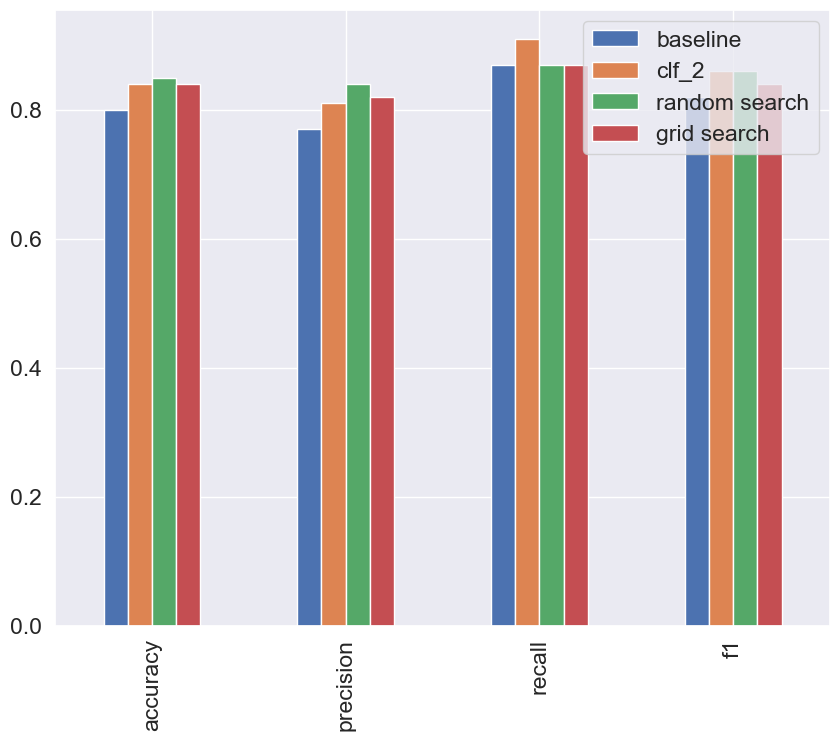

In [290]:
compare_metrics.plot.bar(figsize= (10,8))

In [291]:
machine_learning_steps

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready.',
 '2. choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together]']

## 6. Saving and loading trained machine learning model

Two ways to save and load machine learning model

1. with Python's `pickle` module
2. with the `joblib` module

#### 1. Pickle module

In [297]:
import pickle

# save an existing model to file
pickle.dump(rs_clf, open('random_search_random_forest_model.pkl', 'wb'))

In [300]:
# Load a saved model
loaded_pickle_model = pickle.load(open('random_search_random_forest_model.pkl', 'rb'))

In [302]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 91.30%
Precision: 0.93
Recall: 0.93
F1: 0.93


{'accuracy': 0.91, 'precision': 0.93, 'recall': 0.93, 'f1': 0.93}

In [303]:
from joblib import dump, load

# save model to file
dump(clf_2, filename='clf_2_random_forest_model.joblib')

['clf_2_random_forest_model.joblib']

In [305]:
# Load a saved model
loaded_joblib_model = load(filename= 'clf_2_random_forest_model.joblib')

In [306]:
# Make some predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 95.65%
Precision: 0.96
Recall: 0.96
F1: 0.96


{'accuracy': 0.96, 'precision': 0.96, 'recall': 0.96, 'f1': 0.96}

NOTE: Joblib is better for models on large dataset  

In [307]:
machine_learning_steps

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready.',
 '2. choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together]']

## 7. Putting it all together

In [308]:
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
data.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [309]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [310]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell)
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [324]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
data = data.dropna(subset=['Price'])

# Define different features and transformer pipeline

# Define the categorical features and their transformer
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the door feature and its transformer
door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))
])

# Define the numeric features and their transformer
numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor)
])


# Set up preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('door', door_transformer, door_feature),
        ('num', numeric_transformer, numeric_features)
    ])

# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Split data into features and target
X = data.drop('Price', axis=1)
y = data['Price']
 

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and score the model
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f'Model score: {score}')

Model score: 0.21528416466346045


Summary:
1. Import Libraries: Import necessary libraries for data manipulation, preprocessing, and modeling.
2. Create DataFrame: Define a sample DataFrame.
3. Define Transformers: Set up pipelines to handle missing values and encode categorical features.
4. Combine Transformers: Use ColumnTransformer to apply different preprocessing steps to different columns.
5. Create Pipeline: Combine preprocessing and modeling steps into a single pipeline.
6. Split Data: Split the data into training and testing sets.
7. Fit and Score Model: Train the model and evaluate its performance.

It is also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.

In [336]:
# use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for GridSearchCV

pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],  # Strategy for imputing missing values in numeric features
    'model__n_estimators': [100, 1000],  # Number of trees in the forest
    'model__max_depth': [None, 5],  # Maximum depth of the tree
    'model__max_features': ['sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'model__min_samples_split': [6],  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV with the model pipeline and parameter grid
gs_model  = GridSearchCV(model, pipe_grid, cv=5, verbose=2)

# Fit the GridSearchCV model to the training data
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors'])...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_leaf': [2, 4],
                         'model__min_samples_split': [6],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [337]:
gs_model.score(X_test, y_test)

0.33215491989897195